#Lab 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split# Divide the data function
from tqdm import tqdm
import math
import matplotlib.pyplot as plt

In [ ]:
class linearRegression:
    def __init__(self, X, y, learningRate, tolerance, maxIteration, regulizationParameter, gd = False, regulization = False, stochastic = False):
        self.X = X
        self.y = y
        self.tolerance = tolerance
        self.learningRate = learningRate
        self.maxIteration = maxIteration
        self.gd = gd
        self.re = regulization
        self.re_para = regulizationParameter
        self.sto = stochastic

#divide data training/test
    def trainTestSplit(self):
      X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.3, random_state = 0)
      return X_train, X_test, y_train, y_test

    def add_X0(self, X):
      return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    def normalize(self, X):# z-score
      mean = np.mean(X, 0)
      sd = np.std(X, 0)
      X_norm = (X - mean)/sd

      X_norm = self.add_X0(X_norm)
      return X_norm, mean, sd

    def normalizeTestData(self, X, trainMean, trainSd):
      X_norm = (X- trainMean)/trainSd
      X_norm = self.add_X0(X_norm)
      return X_norm
    
    def rank(self, X, eps = 1e-12):
      u, s, vh =np.linsig.svd(X)
      return len([x for x in s if abs(x) > eps])
    
    def checkMatrix(self, X):
      X_rank = np.linalg.matrix_rank(X)
      if X_rank == min(X.shape[0], X.shape[1]):
        self.fullRank =True 
        print("Data if full Rank")
      else:
        self.fullRank = False
        print("Data is not full rank")
  
    def checkInvertibility(self, X):
      if X.shape[0] < X.shape[1]:
        self.lowRank = True
        print("Data is low Rank")
      else:
        self.lowRank = False
        print("Data is not low Rank")
    
    def closedFormSolution(self, X, y):
      if regression.re == True:
        w = np.linalg.inv(X.T.dot(X) + regression.re_para * np.identity(X.shape[1])).dot(X.T).dot(y)
      else:
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
      return w

    def gradientDescent(self, X, y):
      regression.errorSequences = []
      last = float('inf')

      for t in tqdm(range(self.maxIteration)):
        self.w = self.w - self.learningRate * self.costDerivative(X, y)
        cur = self.sse(X, y)
        diff = last - cur
        last = cur

        regression.errorSequences.append(cur)

        if diff < self.tolerance:
          print("The model stopped - nofurther improvment")
          break
      plt.plot(range(len(regression.errorSequences)),regression.errorSequences)

    def stochastic_gradient_descent(self, X, y):
        error_sequence=[]
        last=float('inf')
        for i in tqdm(range(self.maxIteration)): 
            num=np.random.randint(0,X.shape[0], size = 50)
            self.w=self.w-self.learningRate*self.costDerivative(X[num,], y[num,])
            
            cur=self.sse(X, y)
            diff=last-cur
            last=cur
            
            error_sequence.append(cur)
            
            if diff<self.tolerance:
               print("The model stopped")
               break
        plt.plot(range(len(error_sequence)),error_sequence)
        
    def sse(self, X, y):
      y_hat = self.predict(X)
      return ((y_hat - y)**2).sum()

    def rmse(self,X,y):
      return pow(self.sse(X,y)/len(y),1/2)

    def predict(self, X):
      return X.dot(self.w)


    def costFunction(self, X, y):
      if regression.re == True:
        return (self.sse(X, y)+self.re_para*self.w.T.dot(self.w))/2
      else:
        return self.sse(X, y)/2

    def costDerivative(self, X, y):
      y_hat = self.predict(X)
      if regression.re == True:
        return X.T.dot(y_hat-y)+self.re_para*self.w
      else:
        return X.T.dot(y_hat-y)

    def fit(self):
      self.X_train, self.X_test, self.y_train, self.y_test = self.trainTestSplit()

      self.X_train, self.mean, self.sd = self.normalize(self.X_train)
      self.X_test = self.normalizeTestData(self.X_test, self.mean, self.sd)

      self.checkMatrix(self.X_train)
      self.checkInvertibility(self.X_train)

      if self.fullRank and not self.lowRank and not self.gd and not self.sto:
        print("Sloving using closed from solution")
        self.w=np.ones(self.X_train.shape[1], dtype=np.float64)*0
        self.w = self.closedFormSolution(self.X_train, self.y_train)

      elif self.sto == True:
        print("Sloving using stochastic gradient descent")
        self.w=np.ones(self.X_train.shape[1], dtype=np.float64)*0
        self.stochastic_gradient_descent(self.X_train, self.y_train)

      else:
        print("Sloving using gradient descent")
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)

      print(self.w)
   
    

##housing dataset

In [ ]:
#read data
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("housing.csv", header= None) 
df.head()

Saving housing.csv to housing (2).csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613520,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795044,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601542,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105714,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677075,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976000,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.127000,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Close form with regulization

In [ ]:
#use normal equations with regulization
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 0.0004,
                               tolerance = 0.005, 
                               maxIteration = 50000,
                               gd = False,
                               regulizationParameter = 100,
                               regulization = True,
                               stochastic = False)
regression.fit()

Data if full Rank
Data is not low Rank
Sloving using closed from solution
[17.73546256 -0.71542516  0.55766057 -0.46292927  0.67517581 -0.66916226
  2.6856029  -0.32443536 -1.40894023  0.29679956 -0.58040983 -1.83852336
  0.58334479 -2.59244735]


### Close form without regulization

In [ ]:
#use normal equations without regulization
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 0.0004,
                               tolerance = 0.005, 
                               maxIteration = 50000,
                               gd = False,
                               regulizationParameter = 100,
                               regulization = False,
                               stochastic = False)
regression.fit()

Data if full Rank
Data is not low Rank
Sloving using closed from solution
[22.74548023 -1.01189299  1.05028731  0.07922238  0.61896311 -1.87367112
  2.70526765 -0.27955798 -3.09763515  2.09690865 -1.88608488 -2.26109811
  0.58264435 -3.44050512]


### Gradient descent with regulization

Data if full Rank
Data is not low Rank
Sloving using gradient descent


  0%|          | 137/50000 [00:00<00:05, 9628.18it/s]

The model stopped - nofurther improvment
[17.73546256 -0.71539176  0.55759565 -0.46305347  0.67519611 -0.66904359
  2.68565316 -0.32447287 -1.40886574  0.29645625 -0.58006029 -1.83850044
  0.58334448 -2.59242534]


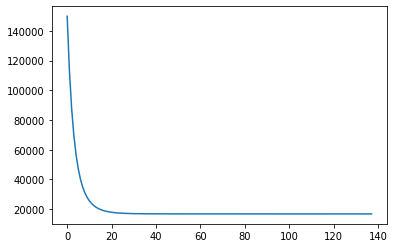

In [ ]:
#use gradient descent
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 4e-4,
                               tolerance = 5e-3, 
                               maxIteration = 50000,
                               gd = True,
                               regulizationParameter = 100,
                               regulization = True,
                               stochastic = False)
regression.fit()

###Gradient descent without regulization

Data if full Rank
Data is not low Rank
Sloving using gradient descent


  1%|          | 363/50000 [00:00<00:01, 25003.41it/s]

The model stopped - nofurther improvment
[22.74548023 -1.00695704  1.04172285  0.05071163  0.62307035 -1.86558657
  2.71080706 -0.28572203 -3.09874371  2.02599784 -1.80638574 -2.25793522
  0.58123396 -3.4382458 ]


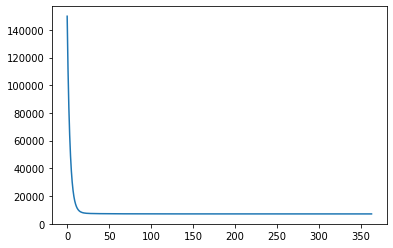

In [ ]:
#use gradient descent without regulization
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 0.0004,
                               tolerance = 0.005, 
                               maxIteration = 50000,
                               gd = True,
                               regulizationParameter = 100,
                               regulization = False,
                               stochastic = False)
regression.fit()

###Stochastic Gradient descent without regulization

Data if full Rank
Data is not low Rank
Sloving using stochastic gradient descent


  0%|          | 139/50000 [00:00<00:04, 12407.86it/s]

The model stopped
[21.30664797 -0.73544863  0.45290325 -0.53118366  0.81693275 -0.62456169
  3.03449303 -0.13666677 -1.52845558  0.44120753 -0.50441004 -2.0097705
  0.60155198 -3.00663848]


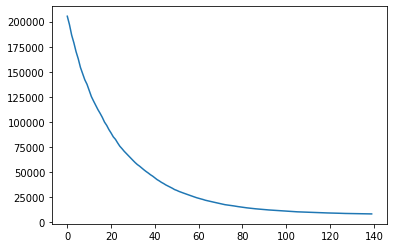

In [ ]:
#use sto
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 0.0004,
                               tolerance = 0.005, 
                               maxIteration = 50000,
                               gd = False, 
                              regulizationParameter = 100,
                              stochastic = True)
regression.fit()

###Stochastic Gradient descent with regulization

Data if full Rank
Data is not low Rank
Sloving using stochastic gradient descent


  0%|          | 35/50000 [00:00<00:03, 15730.89it/s]

The model stopped
[ 6.74594791 -0.49926692  0.22108989 -0.41701283  0.51432438 -0.40508851
  1.42236597 -0.33780289 -0.16976219 -0.36395869 -0.58180024 -0.84605683
  0.38013088 -1.34956432]


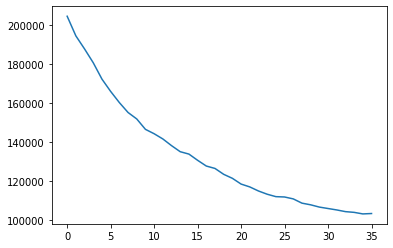

In [ ]:
#use sto with regu
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 0.0004,
                               tolerance = 0.005, 
                               maxIteration = 50000,
                               gd = False, 
                               regulizationParameter = 100,
                               regulization = True,
                               stochastic = True)
regression.fit()

###RMSE & SSE

In [ ]:
#sse
print("SSE:", regression.costFunction(regression.X_test,regression.y_test))
#
print("RMSE:", regression.rmse(regression.X_test,regression.y_test))

SSE: 21114.647933923545
RMSE: 7.505985429178002


##Yacht

In [ ]:
#read cvs
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("yachtData.csv",header= None) 
df.head()

Saving yachtData.csv to yachtData (2).csv


,0,1,2,3,4,5,6
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [ ]:
df.describe()

,0,1,2,3,4,5,6
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


### Close form with regulization

In [ ]:
#use normal equations with regulization
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 1e-3,
                               tolerance = 1e-3, 
                               maxIteration = 50000,
                               gd = False,
                               regulizationParameter = 100,
                               regulization = True,
                               stochastic = False)
regression.fit()

Data if full Rank
Data is not low Rank
Sloving using closed from solution
[ 7.67133333  0.62686265 -0.45037461 -0.35431425 -0.10386047 -0.52005706
  8.83202127]


### Close form without regulization

In [ ]:
#use normal equations without regulization
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 1e-3,
                               tolerance = 1e-3, 
                               maxIteration = 50000,
                               gd = False,
                               regulizationParameter = 100,
                               regulization = False,
                               stochastic = False)
regression.fit()

Data if full Rank
Data is not low Rank
Sloving using closed from solution
[11.23939535  0.81790302  0.20369276  2.97602416 -2.75890138 -3.83325201
 12.9328097 ]


### Gradient descent with regulization

Data if full Rank
Data is not low Rank
Sloving using gradient descent


  0%|          | 48/50000 [00:00<00:03, 12911.34it/s]

The model stopped - nofurther improvment
[ 7.67133327  0.62686025 -0.45044054 -0.35457674 -0.10364624 -0.51980311
  8.832021  ]


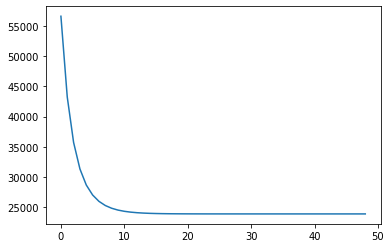

In [ ]:
#use gradient descent
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 1e-3,
                               tolerance = 1e-3,  
                               maxIteration = 50000,
                               gd = True,
                               regulizationParameter = 100,
                               regulization = True,
                               stochastic = False)
regression.fit()

###Gradient descent without regulization

Data if full Rank
Data is not low Rank
Sloving using gradient descent


  3%|▎         | 1643/50000 [00:00<00:01, 46604.64it/s]

The model stopped - nofurther improvment
[11.23939535  0.81522178  0.13102656  2.68675502 -2.5228081  -3.55339498
 12.93260437]


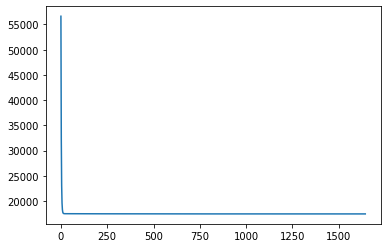

In [ ]:
#use gradient descent without regulization
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 1e-3,
                               tolerance = 1e-3,  
                               maxIteration = 50000,
                               gd = True,
                               regulizationParameter = 100,
                               regulization = False,
                               stochastic = False)
regression.fit()

###Stochastic Gradient descent without regulization

Data if full Rank
Data is not low Rank
Sloving using stochastic gradient descent


  0%|          | 40/50000 [00:00<00:06, 7233.74it/s]

The model stopped
[ 9.69444089  0.67020644 -0.60052015 -0.40340215 -0.09149179 -0.59442528
 11.07203931]


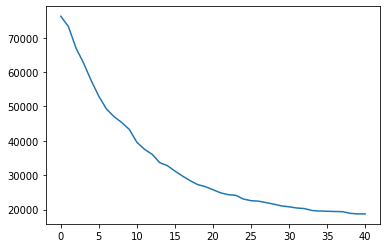

In [ ]:
#use sto
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 1e-3,
                               tolerance = 1e-3,  
                               maxIteration = 50000,
                               gd = False, 
                              regulizationParameter = 100,
                              stochastic = True)
regression.fit()

###Stochastic Gradient descent with regulization

Data if full Rank
Data is not low Rank
Sloving using stochastic gradient descent


  0%|          | 9/50000 [00:00<00:10, 4938.35it/s]

The model stopped
[ 2.71751692  0.35295323 -0.06990647 -0.52310345 -0.30602904 -0.27839797
  3.07590265]


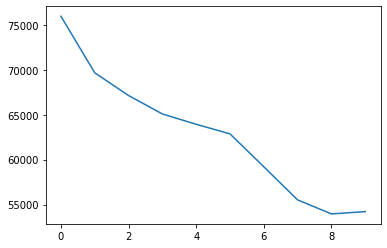

In [ ]:
#use sto with regu
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 1e-3,
                               tolerance = 1e-3,  
                               maxIteration = 50000,
                               gd = False, 
                               regulizationParameter = 100,
                               regulization = True,
                               stochastic = True)
regression.fit()

###RMSE & SSE

In [ ]:
#sse
print("SSE:", regression.costFunction(regression.X_test,regression.y_test))
#
print("RMSE:", regression.rmse(regression.X_test,regression.y_test))

SSE: 8522.954369655721
RMSE: 12.828008366095368


##concrete

In [ ]:
#read cvs
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("concreteData.csv",header= None) 
df.head()

Saving concreteData.csv to concreteData.csv


,0,1,2,3,4,5,6,7,8
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Close form with regulization

In [ ]:
#use normal equations with regulization
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 7e-4,
                               tolerance = 1e-4, 
                               maxIteration = 50000,
                               gd = False,
                               regulizationParameter = 100,
                               regulization = True,
                               stochastic = False)
regression.fit()

Data if full Rank
Data is not low Rank
Sloving using closed from solution
[31.48661389  6.96527588  3.90534525  0.93315229 -4.69943377  2.8806971
 -1.11414466 -2.0182032   5.91158313]


### Close form without regulization

In [ ]:
#use normal equations without regulization
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 7e-4,
                               tolerance = 1e-4, 
                               maxIteration = 50000,
                               gd = False,
                               regulizationParameter = 100,
                               regulization = False,
                               stochastic = False)
regression.fit()

Data if full Rank
Data is not low Rank
Sloving using closed from solution
[35.85368932 12.72547471  9.54463305  5.99752761 -2.82130272  2.10540297
  1.85195151  1.95023318  7.17433735]


### Gradient descent with regulization

Data if full Rank
Data is not low Rank
Sloving using gradient descent


  0%|          | 154/50000 [00:00<00:02, 21701.48it/s]

The model stopped - nofurther improvment
[31.48661389  6.96527492  3.90534429  0.93315144 -4.69943459  2.88069699
 -1.11414542 -2.01820414  5.9115831 ]


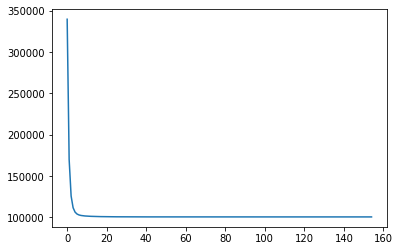

In [ ]:
#use gradient descent
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 7e-4,
                               tolerance = 1e-4,  
                               maxIteration = 50000,
                               gd = True,
                               regulizationParameter = 100,
                               regulization = True,
                               stochastic = False)
regression.fit()

###Gradient descent without regulization

Data if full Rank
Data is not low Rank
Sloving using gradient descent


  1%|          | 440/50000 [00:00<00:01, 25188.26it/s]

The model stopped - nofurther improvment
[35.85368932 12.72033523  9.53947715  5.99298714 -2.82570188  2.10479451
  1.84789054  1.94520372  7.17419989]


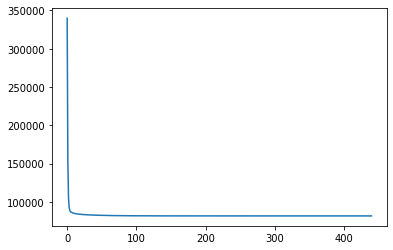

In [ ]:
#use gradient descent without regulization
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 7e-4,
                               tolerance = 1e-4,  
                               maxIteration = 50000,
                               gd = True,
                               regulizationParameter = 100,
                               regulization = False,
                               stochastic = False)
regression.fit()

###Stochastic Gradient descent without regulization

Data if full Rank
Data is not low Rank
Sloving using stochastic gradient descent


  0%|          | 86/50000 [00:00<00:04, 10532.61it/s]

The model stopped
[34.19393994  6.76642618  3.12917222  0.4379156  -5.02245733  4.09897908
 -1.62077566 -2.53471945  6.21308034]


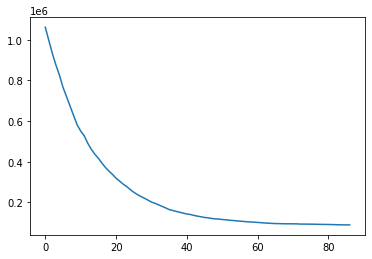

In [ ]:
#use sto
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 7e-4,
                               tolerance = 1e-4,  
                               maxIteration = 50000,
                               gd = False, 
                              regulizationParameter = 100,
                              stochastic = True)
regression.fit()

###Stochastic Gradient descent with regulization

Data if full Rank
Data is not low Rank
Sloving using stochastic gradient descent


  0%|          | 20/50000 [00:00<00:06, 7550.50it/s]


The model stopped
[10.44715405  1.95880351  1.25043556 -0.57223701 -1.23392204  1.79115453
 -1.2456668  -0.55404967  1.00211211]


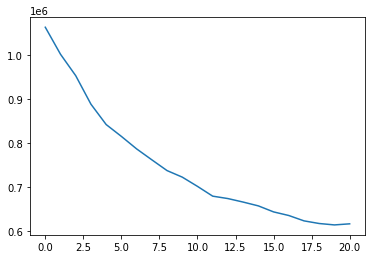

In [ ]:
#use sto with regu
regression = linearRegression(df.values[:,0:-1], df.values[:, -1],
                               learningRate = 7e-4,
                               tolerance = 1e-4,  
                               maxIteration = 50000,
                               gd = False, 
                               regulizationParameter = 100,
                               regulization = True,
                               stochastic = True)
regression.fit()

###RMSE & SSE

In [ ]:
#sse
print("SSE:", regression.costFunction(regression.X_test,regression.y_test))
#
print("RMSE:", regression.rmse(regression.X_test,regression.y_test))

SSE: 135441.33245460456
RMSE: 28.93113116089367


##obersevation

### Learningrate:  learning rate will reduce the times of iteration. 
### Stochastic GD and GD:  Stochastic more fast and more easy to arrive the convergence
### Regulization:  Regulization will change the model and avoid the overfitting.